In [21]:
import pandas as pd
import numpy as np
new_df = pd.DataFrame()

# Load the stock data into two separate dataframes, stockA and stockB
stockB = pd.read_csv("D:\Downloads\Gemini_ETHUSD_1h.csv")
stockA = pd.read_csv("D:\Downloads\Gemini_BTCUSD_1h.csv")
stockA['date'] = pd.to_datetime(stockA['date'])
stockB['date'] = pd.to_datetime(stockB['date'])
# select rows with date after 2020-01-01
stockA = stockA[stockA['date'] > '2020-01-01']
stockB = stockB[stockB['date'] > '2020-01-01']
# make date as index
stockA.set_index('date', inplace=True)
stockB.set_index('date', inplace=True)
# select 3 columns which are date and symbol and close columns
stockA = stockA[['symbol','close']]
stockB = stockB[['symbol','close']]


# Set the lookback window and the list of N-day periods to compute z-scores for
lookback_window = 60
n_periods = [5, 10, 20]

# Compute the rolling N-day returns for each stock
for n in n_periods:
    stockA[f'returns_{n}d'] = (stockA['close'] - stockA['close'].shift(n)) / stockA['close'].shift(n)
    stockB[f'returns_{n}d'] = (stockB['close'] - stockB['close'].shift(n)) / stockB['close'].shift(n)


# Compute the trailing N-day means and standard deviations for each stock
for n in n_periods:
    stockA[f'stddev_{n}d'] = stockA[f'returns_{n}d'].rolling(window=lookback_window).std(ddof=1).shift(1)
    stockB[f'stddev_{n}d'] = stockB[f'returns_{n}d'].rolling(window=lookback_window).std(ddof=1).shift(1)

# Compute the z-scores for each stock for each N-day period
for n in n_periods:
    stockA[f'zscore_{n}d'] = stockA[f'returns_{n}d'] / stockA[f'stddev_{n}d']
    stockB[f'zscore_{n}d'] = stockB[f'returns_{n}d']  / stockB[f'stddev_{n}d']

for n in n_periods:
    new_df[f'diff_{n}d'] = stockA[f'zscore_{n}d'] - stockB[f'zscore_{n}d']




In [22]:
stockA


,symbol,close,returns_5d,returns_10d,returns_20d,stddev_5d,stddev_10d,stddev_20d,zscore_5d,zscore_10d,zscore_20d
date,,,,,,,,,,,
2020-01-01 01:00:00,BTC/USD,7185.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,BTC/USD,7220.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,BTC/USD,7199.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,BTC/USD,7188.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 05:00:00,BTC/USD,7199.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14 19:00:00,BTC/USD,30336.07,-0.009722,-0.015967,-0.002513,0.007220,0.009248,0.009652,-1.346486,-1.726506,-0.260402
2023-04-14 20:00:00,BTC/USD,30466.45,0.006616,-0.011019,0.001680,0.007350,0.009478,0.009655,0.900234,-1.162593,0.173984
2023-04-14 21:00:00,BTC/USD,30475.61,0.010560,-0.011633,0.001981,0.007387,0.009465,0.009562,1.429589,-1.229023,0.207161


In [23]:
stockB

,symbol,close,returns_5d,returns_10d,returns_20d,stddev_5d,stddev_10d,stddev_20d,zscore_5d,zscore_10d,zscore_20d
date,,,,,,,,,,,
2020-01-01 01:00:00,ETH/USD,129.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,ETH/USD,130.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,ETH/USD,129.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,ETH/USD,129.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 05:00:00,ETH/USD,129.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14 19:00:00,ETH/USD,2092.42,-0.001308,-0.010133,0.038834,0.018018,0.023106,0.027008,-0.072583,-0.438554,1.437900
2023-04-14 20:00:00,ETH/USD,2107.51,0.023108,-0.003282,0.046919,0.018046,0.023054,0.025973,1.280515,-0.142370,1.806461
2023-04-14 21:00:00,ETH/USD,2105.20,0.020569,-0.005485,0.045771,0.018111,0.022795,0.024831,1.135747,-0.240607,1.843323


In [24]:
new_df.tail()

,diff_5d,diff_10d,diff_20d
date,,,
2023-04-14 19:00:00,-1.273903,-1.287952,-1.698302
2023-04-14 20:00:00,-0.380282,-1.020222,-1.632476
2023-04-14 21:00:00,0.293842,-0.988416,-1.636162
2023-04-14 22:00:00,0.070152,-0.769635,-1.831185
2023-04-14 23:00:00,0.300390,-0.834665,-0.629599


In [25]:
# define the thresholds for each lookback period
thresholds = {
    5: (1, -1),
    10: (1, -1),
    20: (1, -1)
}

# loop over the lookback periods
for period in n_periods:
    # get the zdiff and threshold values for the current period
    zdiff = new_df[f'diff_{period}d']
    short_threshold, long_threshold = thresholds.get(period,(1, -1))
    
    # create a boolean mask based on the zdiff and threshold values
    short_signal = zdiff > short_threshold
    long_signal = zdiff < long_threshold
    
    # set the signal value where the condition is met
    new_df.loc[short_signal, f'signal_{period}'] = -1
    new_df.loc[long_signal, f'signal_{period}'] = 1


In [26]:
key = 0
value = thresholds.get(key, (10, -10))
print(value)

(10, -10)


In [27]:
# print the number of signals for each period
for period in n_periods:
    print(f'Number of signals for period {period}: {new_df[f"signal_{period}"].count()}')


Number of signals for period 5: 2696
Number of signals for period 10: 3488
Number of signals for period 20: 4527


In [28]:
# print value_counts for each signal
print(new_df['signal_5'].value_counts())
print(new_df['signal_10'].value_counts())
print(new_df['signal_20'].value_counts())



signal_5
 1.0    1384
-1.0    1312
Name: count, dtype: int64
signal_10
 1.0    1803
-1.0    1685
Name: count, dtype: int64
signal_20
 1.0    2372
-1.0    2155
Name: count, dtype: int64


In [29]:
new_df

,diff_5d,diff_10d,diff_20d,signal_5,signal_10,signal_20
date,,,,,,
2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-04-14 19:00:00,-1.273903,-1.287952,-1.698302,1.0,1.0,1.0
2023-04-14 20:00:00,-0.380282,-1.020222,-1.632476,NaN,1.0,1.0
2023-04-14 21:00:00,0.293842,-0.988416,-1.636162,NaN,NaN,1.0


Text(0.5, 0, 'Date')

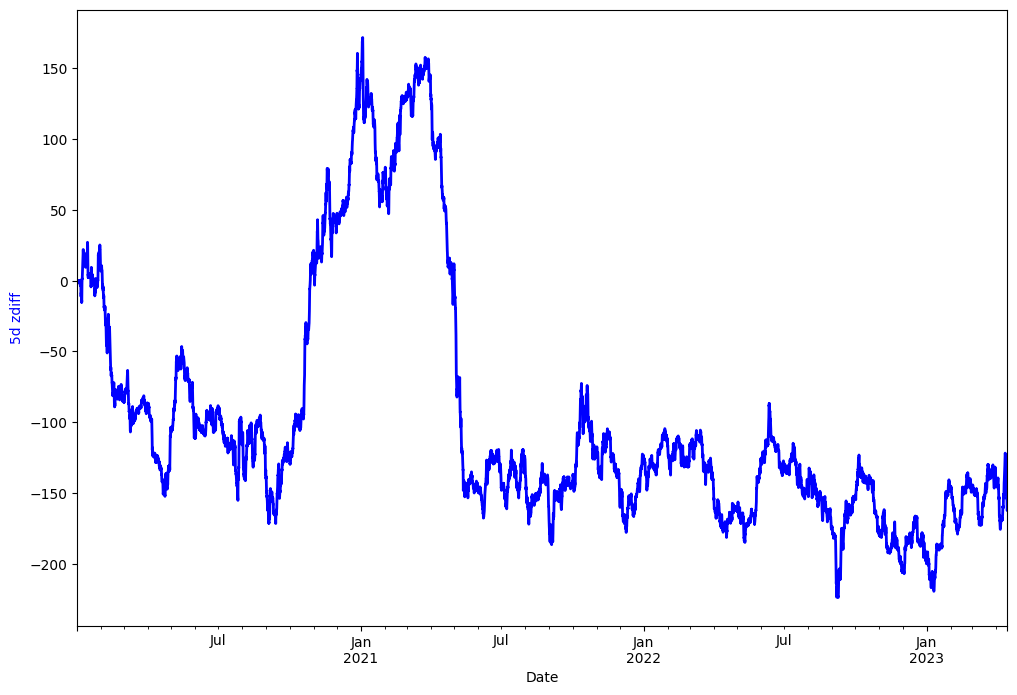

In [32]:
import matplotlib.pyplot as plt
# plot the zdiff values
fig5 = plt.figure(figsize=(12, 8))
ax5 = fig5.add_subplot(111)
new_df['diff_5d'].cumsum().plot(ax=ax5, color='b', lw=2.)
ax5.set_ylabel('5d zdiff', color='b')
ax5.set_xlabel('Date')




Text(0.5, 0, 'Date')

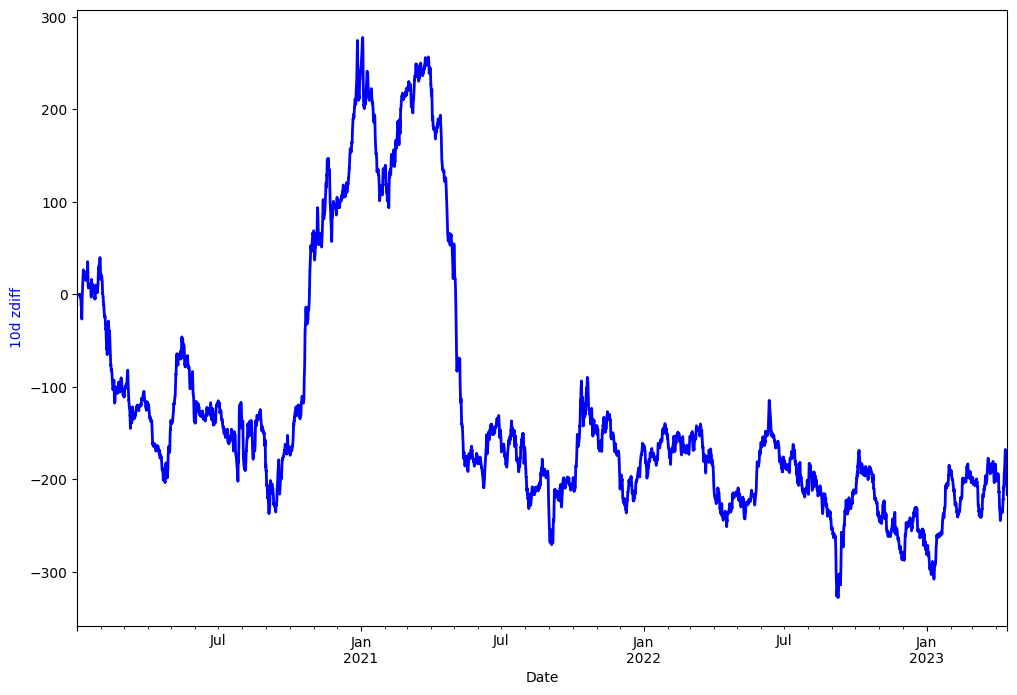

In [33]:
fig10 = plt.figure(figsize=(12, 8))
ax10 = fig10.add_subplot(111)
new_df['diff_10d'].cumsum().plot(ax=ax10, color='b', lw=2.)
ax10.set_ylabel('10d zdiff', color='b')
ax10.set_xlabel('Date')


Text(0.5, 0, 'Date')

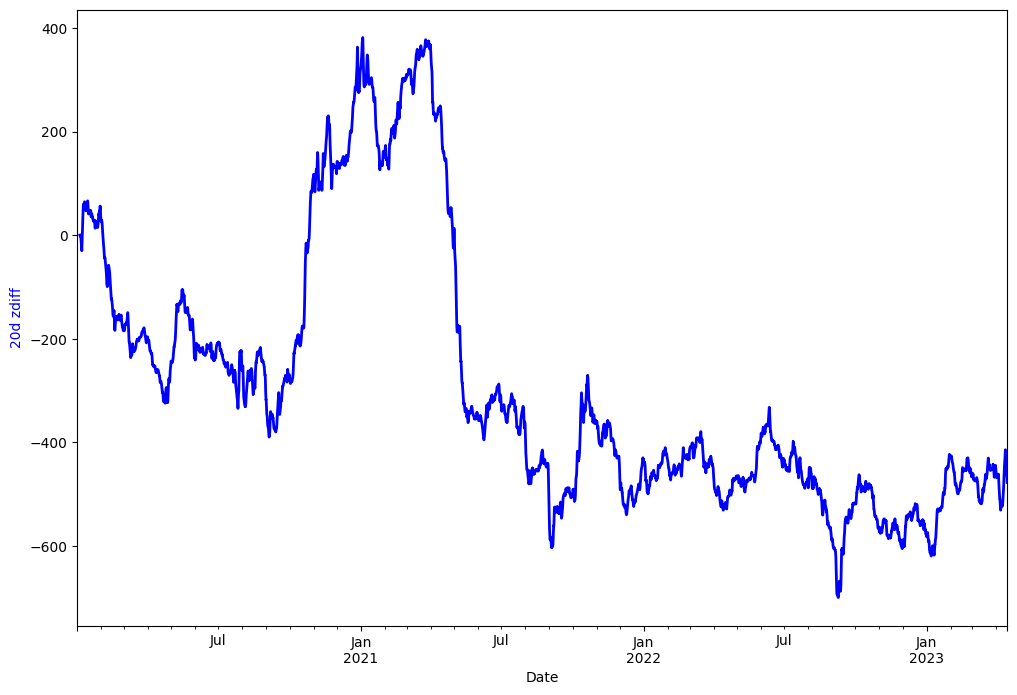

In [34]:
fig20 = plt.figure(figsize=(12, 8))
ax20 = fig20.add_subplot(111)
new_df['diff_20d'].cumsum().plot(ax=ax20, color='b', lw=2.)
ax20.set_ylabel('20d zdiff', color='b')
ax20.set_xlabel('Date')
